# 🫀 **Heart Disease Prediction with Logistic Regression**

---

This interactive notebook demonstrates an end-to-end Machine Learning pipeline to predict heart disease risk using Logistic Regression.

The model leverages a dataset from Kaggle, analyzing patient health indicators such as age, gender, blood pressure, cholesterol levels, and lifestyle factors to determine potential heart attack risks.

---

## 📌 What's Inside?

### 📂 **Data Exploration**
- Loading and inspecting the dataset.
- Checking for missing values, duplicates, and data consistency.

### ⚙️ **Preprocessing and Feature Engineering**
- Encoding categorical variables.
- Splitting features and scaling data.
- Feature engineering (e.g., separating blood pressure into systolic and diastolic).

### 🧠 **Logistic Regression Model**
- Training the logistic regression model.
- Hyperparameter tuning.

### 📊 **Evaluation and Results**
- Calculating key performance metrics (accuracy, precision, recall, F1-score).
- Confusion matrix analysis.

### 🔍 **Interpretation and Conclusions**
- Understanding feature importance.
- Practical implications of results.

### 🖼️ **Visualizations**
- Correlation heatmap for identifying feature relationships.
- Confusion matrix for model evaluation.
- ROC curve with AUC score for classifier performance.

# 📦 Part 1: Dataset Inspection and Cleaning
Initial inspection of the dataset including shape, summary statistics, missing values, and duplicate entries.

### 📥 Step 1.1: Import Required Libraries

In [1]:
# Import core libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

### 📊 Step 1.2: Load Dataset

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv('heart_attack_prediction_dataset.csv')

# Display the first five rows
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### 📐 Step 1.3: Display Dataset Shape

In [3]:
# Print the number of rows and columns in the dataset
print(f"Number of rows in the dataset is {df.shape[0]} and number of columns is {df.shape[1]}")

Number of rows in the dataset is 8763 and number of columns is 26


### 🧾 Feature Descriptions

`Patient ID` – Unique identifier for each patient  
`Age` – Age of the patient  
`Sex` – Gender of the patient (Male/Female)  
`Cholesterol` – Cholesterol levels of the patient  
`Blood Pressure` – Blood pressure of the patient (systolic/diastolic)  
`Heart Rate` – Heart rate of the patient  
`Diabetes` – Whether the patient has diabetes (Yes/No)  
`Family History` – Family history of heart-related problems (1: Yes, 0: No)  
`Smoking` – Smoking status of the patient (1: Smoker, 0: Non-smoker)  
`Obesity` – Obesity status of the patient (1: Obese, 0: Not obese)  
`Alcohol Consumption` – Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)  
`Exercise Hours Per Week` – Number of exercise hours per week  
`Diet` – Dietary habits of the patient (Healthy/Average/Unhealthy)  
`Previous Heart Problems` – Previous heart problems of the patient (1: Yes, 0: No)  
`Medication Use` – Medication usage by the patient (1: Yes, 0: No)  
`Stress Level` – Stress level reported by the patient (1–10)  
`Sedentary Hours Per Day` – Hours of sedentary activity per day  
`Income` – Income level of the patient  
`BMI` – Body Mass Index (BMI) of the patient  
`Triglycerides` – Triglyceride levels of the patient  
`Physical Activity Days Per Week` – Days of physical activity per week  
`Sleep Hours Per Day` – Hours of sleep per day  
`Country` – Country of the patient  
`Continent` – Continent where the patient resides  
`Hemisphere` – Hemisphere where the patient resides  
`Heart Attack Risk` – Presence of heart attack risk (1: Yes, 0: No)

### 📈 Step 1.4: Summary Statistics

In [4]:
# Exploring the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
# Show descriptive statistics for all numerical columns
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


### 🔍 Step 1.5: Check for Missing Values

In [6]:
# Check for any missing values in each column
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

### 🧹 Step 1.6: Check for Duplicate Rows

In [7]:
# Check if there are any duplicate rows
df.duplicated().sum()

0

---

# 🧼 Part 2: Data Preprocessing and Feature Engineering

This section includes removal of non-predictive columns, encoding categorical variables, and extracting numeric features.

### 🔻 Step 2.1: Remove Uninformative Columns
The following columns are identifiers or irrelevant for prediction and should be removed:
- `Patient ID`: unique per row, no predictive value
- `Country`: too general and inconsistent
- `Continent`: redundant with `Hemisphere`

In [8]:
# Drop columns that are identifiers or do not provide predictive value
not_useful = ['Patient ID','Country', 'Continent']
df = df.drop(not_useful, axis = 1)

### 👩‍💼 Step 2.2: Encode Categorical Feature – Sex
We map the `Sex` column to binary values for model compatibility:
- `Female` → `1`
- `Male` → `0`

In [9]:
# Encode 'Sex': Female as 1, Male as 0
df['Sex'] = df['Sex'].map({'Female' : 1, 'Male': 0})

### 🌍 Step 2.3: Encode Hemisphere Feature
`Hemisphere` has two possible values, so we convert them into binary:
- `Northern Hemisphere` → `0`
- `Southern Hemisphere` → `1`

In [10]:
# Encode 'Hemisphere': Northern as 0, Southern as 1
hemisphere_map = {"Northern Hemisphere": 0, "Southern Hemisphere": 1}
df["Hemisphere"] = df["Hemisphere"].map(hemisphere_map)

### 💉 Step 2.4: Split Blood Pressure Column
`Blood Pressure` is a text field like `"120/80"`. We split it into two numeric columns:
- `Systolic_BP`
- `Diastolic_BP`

In [11]:
# Split 'Blood Pressure' column into systolic and diastolic values
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand = True).astype(float)

# Drop original 'Blood Pressure' column
df.drop('Blood Pressure', axis = 1, inplace = True)

### 🥗 Step 2.5: Encode Dietary Feature
The `Diet` column contains three categories. We encode them as:
- `Healthy` → `0`
- `Average` → `1`
- `Unhealthy` → `2`

In [12]:
# Encode 'Diet': Healthy as 0, Average as 1, Unhealthy as 2
diet_map = {"Healthy" :  0, 'Average': 1, "Unhealthy": 2}
df['Diet'] = df['Diet'].map(diet_map)

In [13]:
# Display cleaned dataset preview
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,67,0,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,1,0,158.0,88.0
1,21,0,389,98,1,1,1,1,1,1.813242,...,4.963459,285768,27.194973,235,1,7,0,0,165.0,93.0
2,21,1,324,72,1,0,0,0,0,2.078353,...,9.463426,235282,28.176571,587,4,4,0,0,174.0,99.0
3,84,0,383,73,1,1,1,0,1,9.828130,...,7.648981,125640,36.464704,378,3,4,0,0,163.0,100.0
4,66,0,318,93,1,1,1,1,0,5.804299,...,1.514821,160555,21.809144,231,1,5,0,0,91.0,88.0


---

# 🤖 Part 3: Model Training and Evaluation

Train a logistic regression model and evaluate its accuracy.

### 🎯 Step 3.1: Define Features and Target

In [14]:
# Define input features X and target variable y
X = df.copy()
y = df['Heart Attack Risk']

### ✂️ Step 3.2: Train-Test Split with Stratification and Data scaling

In [15]:
# Split the data with stratified sampling to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 42
)

In [16]:
# Scaling the numerical features to improve the quality of the model training
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### 🧑‍🤖 Step 3.3: Train Logistic Regression Model

In [17]:
# Create and train a logistic regression model
model = LogisticRegression(
    solver = 'lbfgs',            # Optimization algorithm
    class_weight = 'balanced',   # Automatically adjust class weights for imbalance
    max_iter = 1000              # Max number of iterations to ensure convergence
)

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

### 🧮 Step 3.4: Generate Predictions

In [18]:
# Prediction on a test sample
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

### 📊 Step 3.5: Evaluate Model Accuracy

In [19]:
# Evaluate accuracy on training and test sets
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Train Accuracy: 0.5144079885877318
Test Accuracy: 0.4837421563034798


###  📈 Step 3.6: Evaluate Metrics

In [20]:
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Results output
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.675
Precision: 0.534
Recall: 0.740
F1-Score: 0.620
Confusion Matrix:
[[719 406]
 [163 465]]


---

# 📊 Visualizations

This section visually demonstrates important insights and model performance metrics from our analysis.

### 🔥 1. Correlation Heatmap

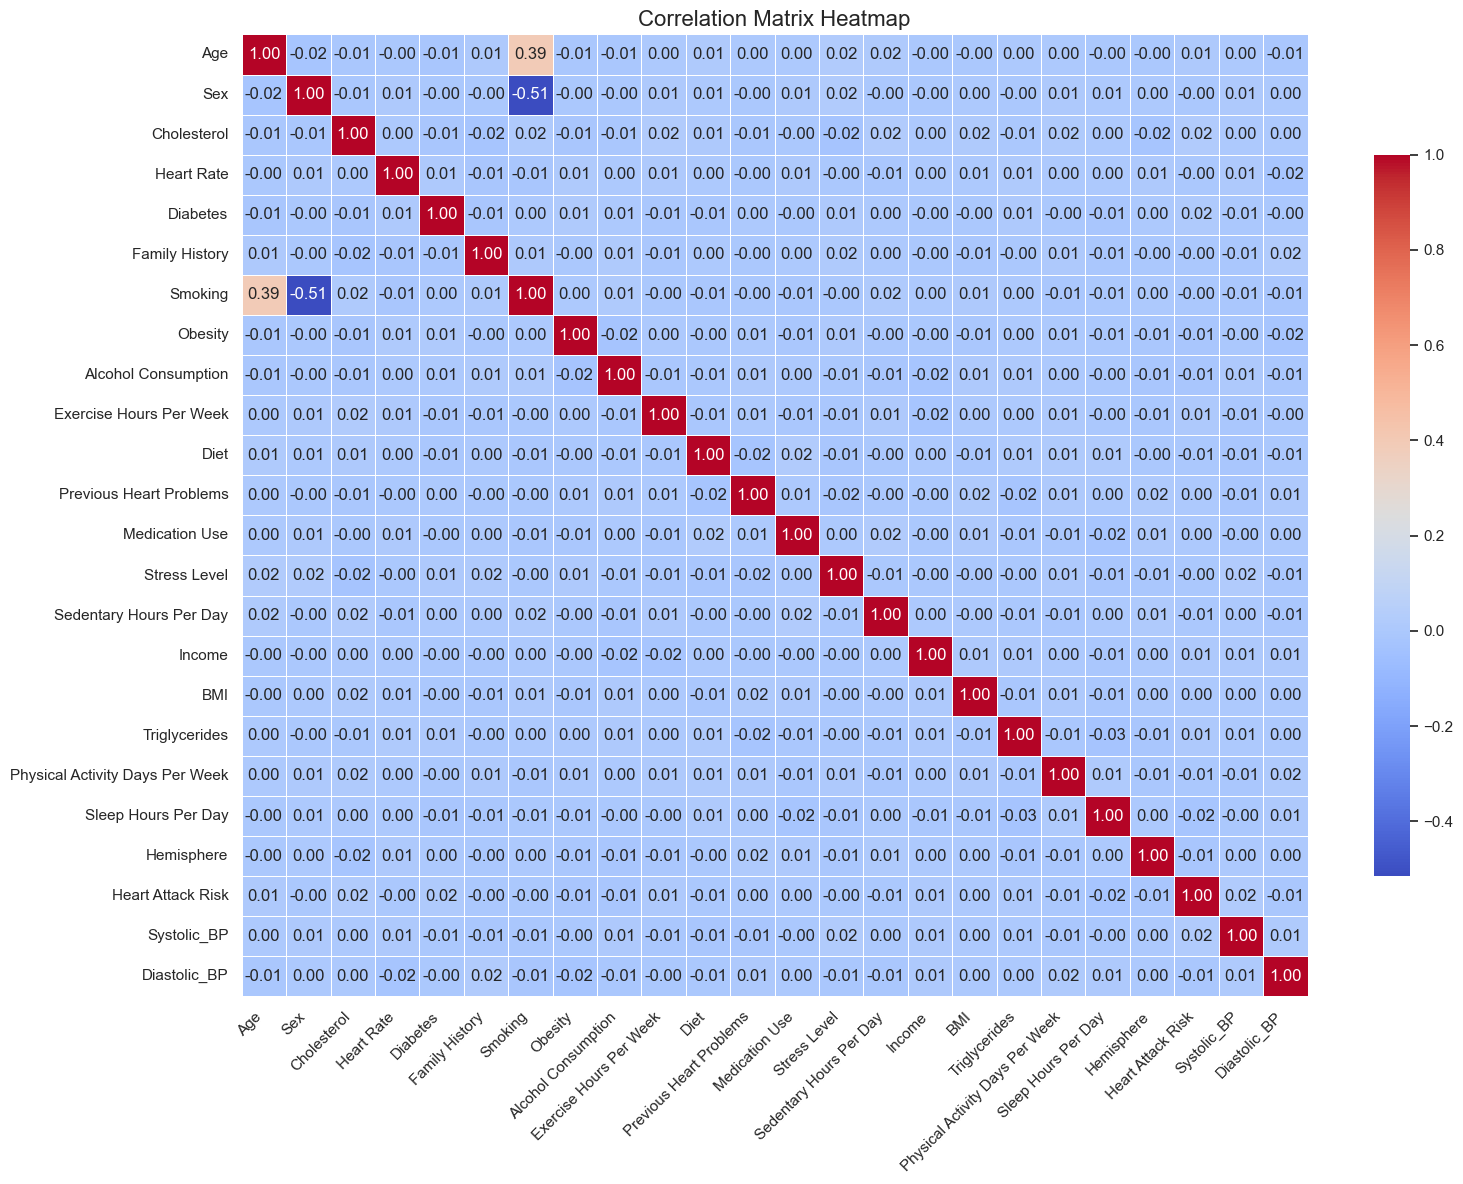

In [21]:
# Set figure size and font
plt.figure(figsize=(16, 12))
sns.set(font_scale=1.0)

# Create a heatmap of correlations
heatmap = sns.heatmap(df.corr(), 
                      annot=True, 
                      fmt=".2f",
                      cmap='coolwarm', 
                      cbar_kws={'shrink': 0.75},  
                      linewidths=0.5,  
                      linecolor='white')

# Set titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)

# Adjust layout and save
plt.tight_layout()
plt.show()

### 🎯 2. Confusion Matrix

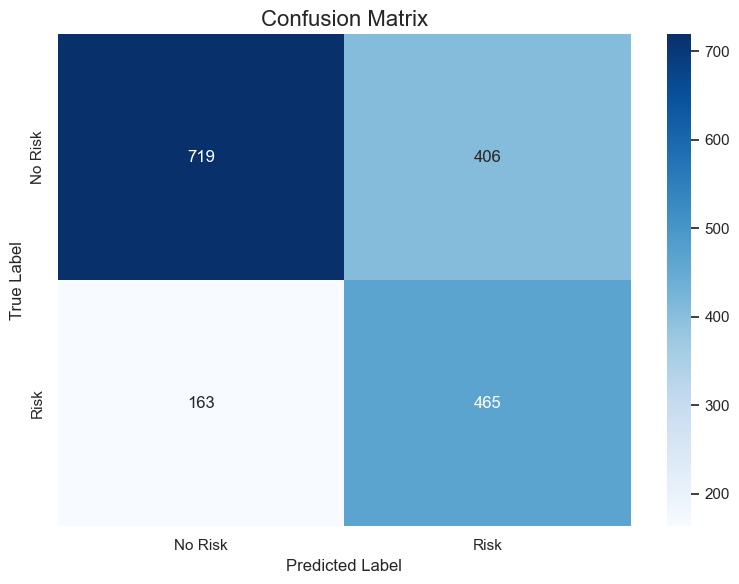

In [22]:
labels = ['No Risk', 'Risk']

# Create heatmap manually for better control
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, linewidths=0, linecolor='white')

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

### 📉 3. ROC Curve and AUC Score

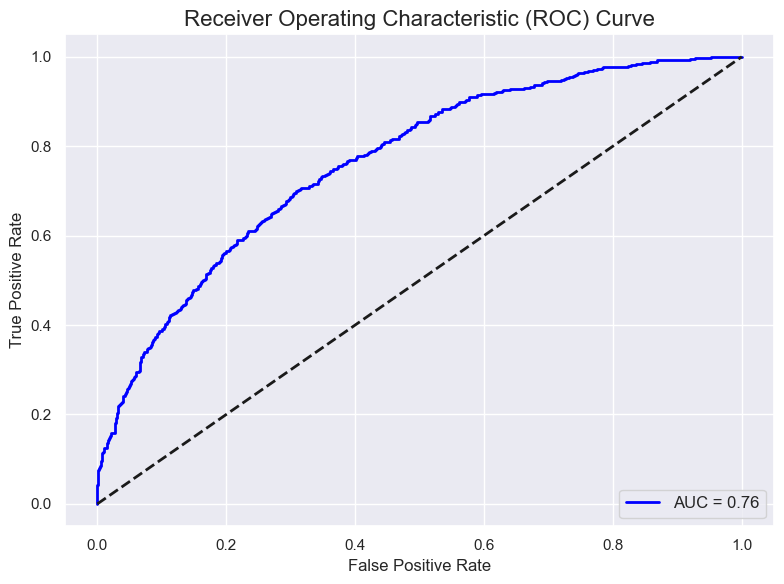

In [23]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Set figure size
plt.figure(figsize=(8, 6))

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--', lw=2)

# Set titles and labels
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)

# Adjust layout and save
plt.tight_layout()
plt.show()